<a href="https://colab.research.google.com/github/M3rtens/FIFA-Dataset-Analysis/blob/main/James_Ver_FIFA_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import PIL
import cv2
from google.colab import drive
import pathlib
import seaborn as sns
import statsmodels.api as sm

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# players15 = pd.read_csv('/content/drive/My Drive/Dataset/fifa22/players_15.csv')
# players16 = pd.read_csv('/content/drive/My Drive/Dataset/fifa22/players_16.csv')
# players17 = pd.read_csv('/content/drive/My Drive/Dataset/fifa22/players_17.csv')
# players18 = pd.read_csv('/content/drive/My Drive/Dataset/fifa22/players_18.csv')
# players19 = pd.read_csv('/content/drive/My Drive/Dataset/fifa22/players_19.csv')
# players20 = pd.read_csv('/content/drive/My Drive/Dataset/fifa22/players_20.csv')
# players21 = pd.read_csv('/content/drive/My Drive/Dataset/fifa22/players_21.csv')
# players22 = pd.read_csv('/content/drive/My Drive/Dataset/fifa22/players_22.csv')
# players15['FIFA'] = 15
# players16['FIFA'] = 16
# players17['FIFA'] = 17
# players18['FIFA'] = 18
# players19['FIFA'] = 19
# players20['FIFA'] = 20
# players21['FIFA'] = 21
# players22['FIFA'] = 22
# playerscombine = pd.concat([players15, players16, players17, players18, players19, players20, players21, players22])

In [ ]:
# playerscombine.shape

In [ ]:
# playerscombine = playerscombine.dropna(axis=1)

In [ ]:
# from collections import Counter
# Counter(playerscombine['FIFA'])
# # General increase in the count of players for each FIFA possibly because of an increase in the number of leagues and maybe due to more youth players coming in than older players retiring.


In [ ]:
# playerscombine.shape

In [ ]:
# for i in playerscombine.columns:
#   print(i)

In [ ]:
# playerscombine = playerscombine.drop('nationality_id', axis=1)
# for i in playerscombine.columns:
#   print(i)

In [ ]:
# playerscombine[['lb','rb']]
#Game/Dataset does not consider their preferred foot when determing the rating for each position or the specific role for each position (Inverted winger vs. Traditional winger)

In [ ]:
# fifa21=playerscombine.loc[playerscombine['FIFA']==21]
# fifa21.shape
# fifa21.head()

In [ ]:
pd.set_option('display.max_rows', None)
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

# fifa21.loc[fifa21.short_name == 'L. Messi']

In [ ]:
# for i in range(0, len(fifa21.columns)):
#   print(fifa21.columns[i],'      ', fifa21.loc[0][i])

In [ ]:
# 1) modify rwb, lb, gk, ... variables
# 2) sort out player_positions
# 3) Group Players by Positions
# print(fifa21.shape)
# for i in range(len(fifa21)-5, len(fifa21)):
#   for j in range(len(fifa21.columns)-5, len(fifa21.columns)):
#     print(i, j)

    # if '+' in fifa21.loc[i][j]:
    #   fifa21.at[i, j] = fifa21.loc[i][j][0:fifa21.loc[i][j].index('+')]

In [ ]:
# fifa21[fifa21.columns[52:79]].iloc[:5]

In [ ]:
# str(8).split('-')

In [ ]:
# for j in fifa21.columns[52:80]:
#   for i in range(0, len(fifa21[j])):
#     if len(str(fifa21[j][i]).split('-'))>1:
#       fifa21[j][i]= int(fifa21[j][i].split('-')[0]) - int(fifa21[j][i].split('-')[1])
#     elif len(str(fifa21[j][i]).split('+'))>1:
#       fifa21[j][i] = int(fifa21[j][i].split('+')[0]) + int(fifa21[j][i].split('+')[1])



In [ ]:
# fifa21.to_csv('/content/drive/MyDrive/JK_project/preprocessed_fifa21.csv')
fifa21 = pd.read_csv('/content/drive/MyDrive/JK_project/preprocessed_fifa21.csv')


In [ ]:
fifa21.iloc[0:10,52:80]

,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,14,8,92,92,92,92,93,93,93,92,...,69,68,68,68,69,65,55,55,55,65
1,14,11,92,92,92,89,91,91,91,89,...,68,64,64,64,68,64,57,57,57,64
2,8,10,91,91,91,85,87,87,87,85,...,67,68,68,68,67,64,63,63,63,64
3,15,11,87,87,87,90,89,89,89,90,...,70,65,65,65,70,65,52,52,52,65
4,10,13,86,86,86,88,88,88,88,88,...,82,83,83,83,82,78,72,72,72,78
5,90,90,36,36,36,32,35,35,35,32,...,35,39,39,39,35,35,36,36,36,35
6,88,90,38,38,38,34,38,38,38,34,...,36,44,44,44,36,34,36,36,36,34
7,11,11,73,73,73,68,69,69,69,68,...,83,88,88,88,83,85,91,91,91,85
8,7,14,90,90,90,89,89,89,89,89,...,72,68,68,68,72,69,62,62,62,69
9,11,14,88,88,88,88,88,88,88,88,...,74,71,71,71,74,70,61,61,61,70


In [ ]:
fifa21 = fifa21.loc[:, ~fifa21.columns.isin(['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk'])]

In [ ]:
# fifa21.to_csv('/content/drive/My Drive/JK_project/preprocessed_fifa21.csv')

In [ ]:
# fifa21 = fifa21.drop(labels=['sofifa_id', 'player_url', 'long_name', 'dob', 'real_face', 'player_face_url', 'nation_flag_url'], axis=1)
for i in range(len(fifa21['player_positions'])):
  fifa21['player_positions'][i] = fifa21['player_positions'][i].split(", ")[0]
  # ['CAM', 'RM', 'LM']
# Counter(fifa21['player_positions'])
for i in range(len(fifa21['player_positions'])):
  if fifa21['player_positions'][i] == 'RW' or fifa21['player_positions'][i] == 'LW':
    fifa21['player_positions'][i] = 'WING'
  if fifa21['player_positions'][i] == 'RM' or fifa21['player_positions'][i] == 'LM':
    fifa21['player_positions'][i] = 'WIDE MIDFIELDER'
  if fifa21['player_positions'][i] == 'RWB' or fifa21['player_positions'][i] == 'LWB':
    fifa21['player_positions'][i] = 'WING BACK'
  if fifa21['player_positions'][i] == 'RB' or fifa21['player_positions'][i] == 'LB':
    fifa21['player_positions'][i] = 'FULL BACK'

# print(fifa21['player_positions'])
print(fifa21.player_positions.unique())
strikers = fifa21.loc[fifa21['player_positions'] == 'ST']
center_fwd = fifa21.loc[fifa21['player_positions'] == 'CF']
wings = fifa21.loc[fifa21['player_positions'] == 'WING'] 
wide_mids = fifa21.loc[fifa21['player_positions'] == 'WIDE MIDFIELDER']
att_mids = fifa21.loc[fifa21['player_positions'] == 'CAM']
center_mids = fifa21.loc[fifa21['player_positions'] == 'CM']
def_mids = fifa21.loc[fifa21['player_positions'] == 'CDM']
wing_backs = fifa21.loc[fifa21['player_positions'] == 'WING BACK']
full_backs = fifa21.loc[fifa21['player_positions'] == 'FULL BACK']
center_backs = fifa21.loc[fifa21['player_positions'] == 'CB']
goalkeepers = fifa21.loc[fifa21['player_positions'] == 'GK']


# Counter(fifa21['player_positions'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['WING' 'ST' 'CAM' 'GK' 'CB' 'CF' 'CDM' 'CM' 'WIDE MIDFIELDER' 'FULL BACK'
 'WING BACK']


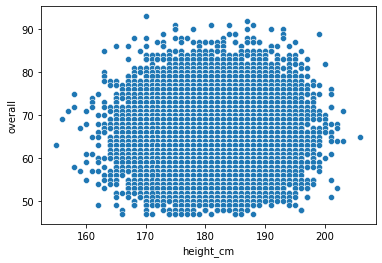

In [ ]:
sns.scatterplot(data=fifa21, x="height_cm", y="overall")

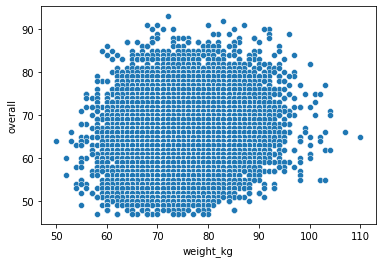

In [ ]:
sns.scatterplot(data=fifa21, x="weight_kg", y="overall")

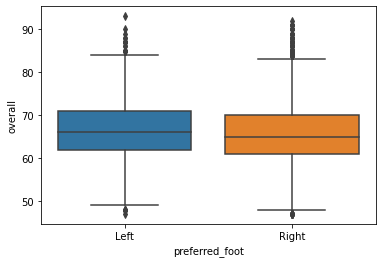

In [ ]:
sns.boxplot(data=fifa21, x = 'preferred_foot', y = 'overall')

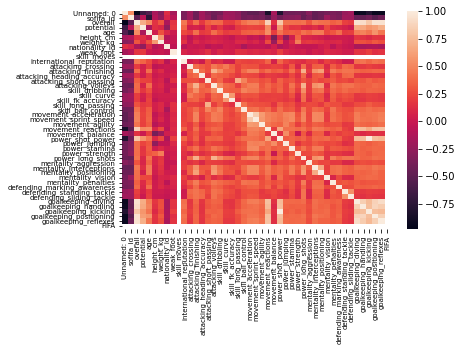

In [ ]:
corr = goalkeepers.corr()
a = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)
a.tick_params(axis='x', which = 'major', labelsize = 7)
a.tick_params(axis='y', which = 'major', labelsize = 7)

In [ ]:
# corr = strikers.corr().unstack()
# corr.sort_values(ascending = True)
# print(corr)
# center_mids.corr()[center_mids.corr()>0.6]


# sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [ ]:
# playerscombine.describe()
#Average overall is 65
#Average wage is 16,221 euros per week = 843,492 euroes per year
#However, the median wage is 6,000 euros per week. (50th percentile)
#The standard deviation for the wage is incredibly high meaning that there are huge outliers. 
fifa21.columns


Index(['Unnamed: 0', 'sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality_id', 'nationality_name', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'real_face', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tac

In [ ]:
# fifa21[['ls', 'st', 'rs',
#        'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
#        'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
#        'rcb', 'rb', 'gk']] = fifa21[['ls', 'st', 'rs',
#        'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
#        'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
#        'rcb', 'rb', 'gk']].astype(int)

# x_columns = [  'potential', 'age',
#        'height_cm', 'weight_kg',
#        'weak_foot', 'skill_moves', 'international_reputation', 'attacking_crossing', 'attacking_finishing',
#        'attacking_heading_accuracy', 'attacking_short_passing',
#        'attacking_volleys', 'skill_dribbling', 'skill_curve',
#        'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
#        'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
#        'movement_reactions', 'movement_balance', 'power_shot_power',
#        'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
#        'mentality_aggression', 'mentality_interceptions',
#        'mentality_positioning', 'mentality_vision', 'mentality_penalties',
#        'defending_marking_awareness', 'defending_standing_tackle',
#        'defending_sliding_tackle', 'goalkeeping_diving',
#        'goalkeeping_handling', 'goalkeeping_kicking',
#        'goalkeeping_positioning', 'goalkeeping_reflexes','ls', 'st', 'rs',
#        'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
#        'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
#        'rcb', 'rb', 'gk']

# y = goalkeepers.overall

In [ ]:
x_columns = [  'potential', 'age',
       'height_cm', 'weight_kg',
       'weak_foot', 'skill_moves', 'international_reputation', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

y = goalkeepers.overall

In [ ]:
fifa21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   18944 non-null  int64 
 1   sofifa_id                    18944 non-null  int64 
 2   player_url                   18944 non-null  object
 3   short_name                   18944 non-null  object
 4   long_name                    18944 non-null  object
 5   player_positions             18944 non-null  object
 6   overall                      18944 non-null  int64 
 7   potential                    18944 non-null  int64 
 8   age                          18944 non-null  int64 
 9   dob                          18944 non-null  object
 10  height_cm                    18944 non-null  int64 
 11  weight_kg                    18944 non-null  int64 
 12  nationality_id               18944 non-null  int64 
 13  nationality_name             18

In [ ]:
goalkeepers.columns

Index(['Unnamed: 0', 'sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality_id', 'nationality_name', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'real_face', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tac

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

X = goalkeepers[x_columns]

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


['potential', 'international_reputation', 'movement_reactions', 'power_long_shots', 'defending_standing_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']


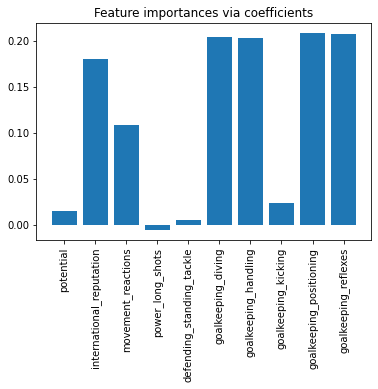

In [ ]:
# Feature Selection Using Ridge

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV



X = goalkeepers[x_columns]
y = goalkeepers.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()


In [ ]:
# Feature Selection Using LASSO

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

estimator = LassoCV(cv=5)

sfm = SelectFromModel(estimator, threshold=0.05, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['movement_reactions', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes'],
      dtype='object')

In [ ]:
#RECURSIVE FEATURE ELIMINATION

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, n_features_to_select=10, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit

#### This uses cross validation method #
# lin_reg = LinearRegression()
# rfe_mod =  RFECV(lin_reg, step=1, cv=300) #RFE(lin_reg, 4, step=1)
# myvalues=rfe_mod.fit(X,y) #to fit
####
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

#Concat and name columns
ranked=pd.concat([pd.DataFrame(X.columns),rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[(ranked['Rank'] ==1)] 
print(most_important)

most_important['Rank'].count()

                     Feature  Rank
0                  potential     1
4                  weak_foot     1
6   international_reputation     1
20        movement_reactions     1
22          power_shot_power     1
35        goalkeeping_diving     1
36      goalkeeping_handling     1
37       goalkeeping_kicking     1
38   goalkeeping_positioning     1
39      goalkeeping_reflexes     1


10

In [ ]:
## Iterate through positions!
position_list = [strikers, center_fwd, wings, wide_mids, att_mids, center_mids, def_mids, wing_backs, full_backs, center_backs, goalkeepers]

for position in position_list:
  X = position[x_columns]
  y = position.overall
  estimator = LassoCV(cv=5)
  sfm = SelectFromModel(estimator, threshold=0.05, prefit=False, norm_order=1, max_features=None)
  sfm.fit(X, y)
  feature_idx = sfm.get_support()
  feature_name = X.columns[feature_idx]
  print(f'10 Important skills for {[name for name in globals() if globals()[name] is position][0]} are:  {feature_name}')


10 Important skills for strikers are:  Index(['attacking_finishing', 'attacking_heading_accuracy', 'skill_dribbling',
       'skill_ball_control', 'movement_reactions', 'power_shot_power',
       'mentality_positioning'],
      dtype='object')
10 Important skills for center_fwd are:  Index(['potential', 'age', 'attacking_finishing', 'attacking_short_passing',
       'skill_dribbling', 'skill_ball_control', 'movement_acceleration',
       'movement_reactions', 'mentality_positioning', 'mentality_vision'],
      dtype='object')
10 Important skills for wings are:  Index(['attacking_crossing', 'attacking_finishing', 'attacking_short_passing',
       'skill_dribbling', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_reactions', 'mentality_positioning',
       'mentality_vision'],
      dtype='object')
10 Important skills for wide_mids are:  Index(['attacking_crossing', 'attacking_finishing', 'attacking_short_passing',
       'skill_dribbling', 'skill

['attacking_heading_accuracy', 'attacking_short_passing', 'skill_ball_control', 'power_jumping', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']


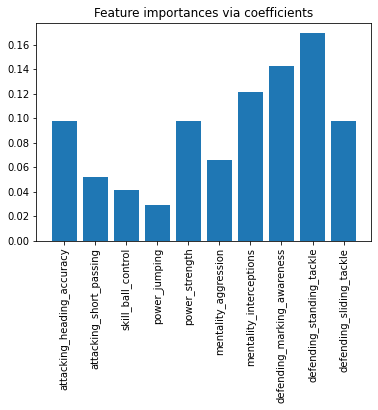

In [ ]:
X = center_backs[x_columns]
y = center_backs.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



['attacking_crossing', 'attacking_short_passing', 'skill_ball_control', 'movement_sprint_speed', 'movement_reactions', 'power_stamina', 'mentality_interceptions', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']


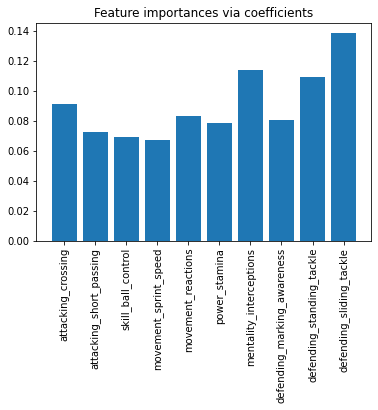

In [ ]:
X = full_backs[x_columns]
y = full_backs.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



In [ ]:
full_backs.shape

(2765, 57)

['attacking_crossing', 'attacking_short_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_reactions', 'power_stamina', 'mentality_interceptions', 'defending_standing_tackle', 'defending_sliding_tackle']


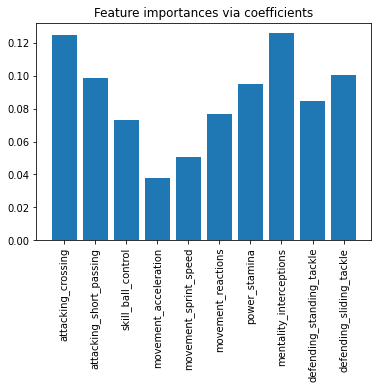

In [ ]:
X = wing_backs[x_columns]
y = wing_backs.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



['attacking_short_passing', 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'defending_marking_awareness', 'defending_standing_tackle']


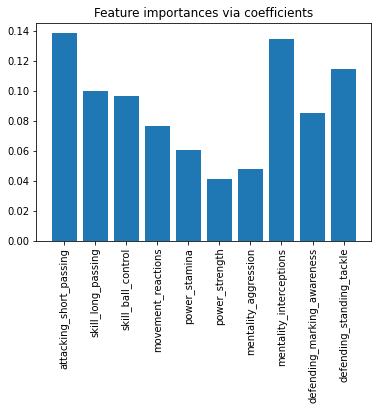

In [ ]:
X = def_mids[x_columns]
y = def_mids.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



['attacking_short_passing', 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_stamina', 'power_long_shots', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'defending_standing_tackle']


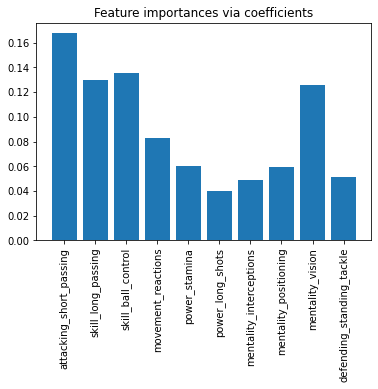

In [ ]:
X = center_mids[x_columns]
y = center_mids.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



['attacking_finishing', 'attacking_short_passing', 'skill_dribbling', 'skill_ball_control', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'power_long_shots', 'mentality_positioning', 'mentality_vision']


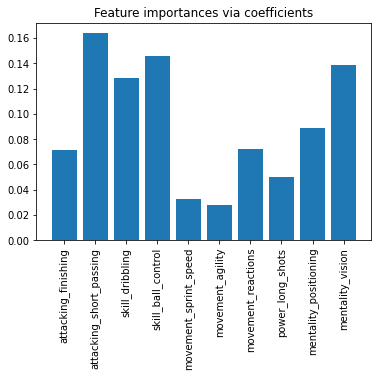

In [ ]:
X = att_mids[x_columns]
y = att_mids.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



['potential', 'attacking_finishing', 'attacking_short_passing', 'skill_dribbling', 'skill_ball_control', 'movement_acceleration', 'movement_reactions', 'power_shot_power', 'mentality_positioning', 'mentality_vision']


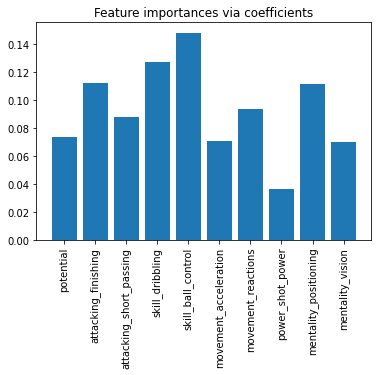

In [ ]:
X = center_fwd[x_columns]
y = center_fwd.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



['attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'skill_dribbling', 'skill_ball_control', 'movement_acceleration', 'movement_reactions', 'power_long_shots', 'mentality_positioning', 'mentality_vision']


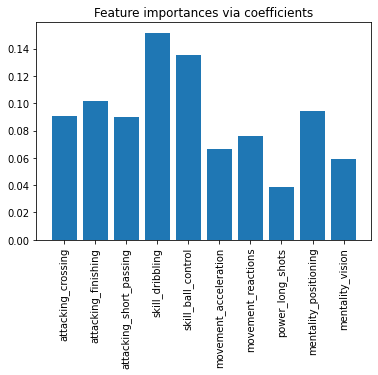

In [ ]:
X = wings[x_columns]
y = wings.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



['attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'skill_dribbling', 'skill_ball_control', 'movement_sprint_speed', 'movement_reactions', 'power_shot_power', 'power_strength', 'mentality_positioning']


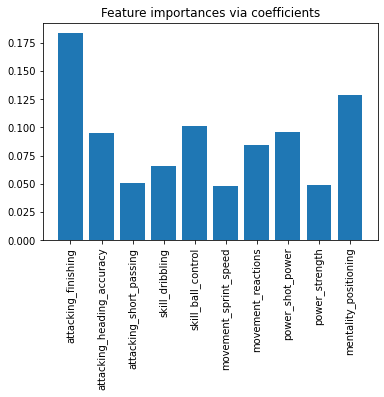

In [ ]:
X = strikers[x_columns]
y = strikers.overall

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X, y)

selected_features = []
selected_ridge_coef = []
for i in range(len(sfs_backward.get_support())):
  if sfs_backward.get_support()[i] == True:
    selected_ridge_coef.append(ridge.coef_[i])
    selected_features.append(x_columns[i])

print(selected_features)

plt.bar(height=selected_ridge_coef, x=selected_features)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()



In [ ]:
ridge.coef_

array([ 1.57019021e-02,  8.57890101e-03,  3.93266296e-03,  6.75144589e-04,
       -1.39025569e-02, -1.62585101e-02,  1.90513133e-01,  6.16030425e-04,
        1.83610502e-01,  9.50559422e-02,  5.02828488e-02,  2.01010228e-02,
        6.59337053e-02, -4.79695707e-04, -1.47059168e-03, -1.09604777e-03,
        1.00965004e-01,  3.96330102e-02,  4.83485555e-02, -7.81660069e-05,
        8.39986407e-02,  1.82416880e-03,  9.60204279e-02, -2.30321814e-04,
        2.02576494e-03,  4.85634686e-02,  3.11686898e-02, -1.05182504e-03,
        2.21478762e-03,  1.28644296e-01, -8.57966036e-04, -5.79546843e-04,
       -9.63608216e-04,  5.49527932e-04, -2.38086424e-04,  1.45929264e-03,
       -8.29783596e-04, -1.81171865e-03,  6.12285814e-04,  3.47662538e-04])

In [ ]:
# x = list(Counter(playerscombine['FIFA']).keys())
# y1 = potential_avg
# y2 = overall_avg

# print(y1)
# print(y2)

# fig, ax1 = plt.subplots()
# ax1.plot(x, y1, 'o', color = 'green')

# ax2 = ax1.twinx()
# ax2.plot(x, y2, 'o', color = 'pink')
# plt.title("potential and overall")

# plt.show()

In [ ]:
# plt.plot(x, y1, 'o', x, y2, 'o')
# plt.show()

In [ ]:
# playerscombine['potential'].loc[playerscombine['FIFA']==15]

import statistics

potential_avg = []
overall_avg = []

for i in list(Counter(playerscombine['FIFA']).keys()):
  potential_avg.append(statistics.mean(playerscombine['potential'].loc[playerscombine['FIFA']== i]))
  overall_avg.append(statistics.mean(playerscombine['overall'].loc[playerscombine['FIFA']== i]))

print(overall_avg)

NameError: ignored

In [ ]:
sns.displot(playerscombine, x="potential")

In [ ]:
sns.boxplot(x = playerscombine['potential'])

In [ ]:
corrMatrix = playerscombine.corr()

In [ ]:
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')